In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup  #to parse data from FInViz
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lasta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Collection -- Phase 1

Collecting News of Stocks

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
news = {}
tickers = ['AMZN', 'TSLA', 'GOOG','PEP','DDOG','SONY','AAPL','COST','JPM','TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']#'TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']
for i in tickers:
    url = finviz_url + i
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)  #read the content in HTML
    news_headline = html.find(id='news-table')
    news[i] = news_headline #building a dictionary

In [3]:
amzn = news['AMZN']
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
  td_text = table_row.td.text
  print(td_text)
  continue
  if td_text.split("-")[0] in ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]:
     a_text = table_row.a.text
     print(a_text)
     print(td_text)
  if i == 1000000:
         break

Mar-07-23 12:00PM
10:51AM
10:39AM
10:07AM
07:02AM
05:35AM
05:35AM
05:20AM
03:22AM
Mar-06-23 06:37PM
05:45PM
05:05PM
02:11PM
02:00PM
01:52PM
12:58PM
12:51PM
12:51PM
11:16AM
11:01AM
10:30AM
10:00AM
09:24AM
07:00AM
06:07AM
05:52AM
05:06AM
Mar-05-23 09:44PM
04:51PM
11:10AM
09:00AM
07:45AM
07:30AM
07:30AM
07:25AM
07:14AM
07:10AM
Mar-04-23 04:58PM
01:52PM
01:06PM
09:05AM
08:45AM
08:13AM
05:52AM
05:30AM
05:06AM
05:00AM
02:00AM
Mar-03-23 07:55PM
06:09PM
05:19PM
05:00PM
04:55PM
04:55PM
03:52PM
03:37PM
03:37PM
03:13PM
02:15PM
02:00PM
01:43PM
01:02PM
12:14PM
11:29AM
10:53AM
10:47AM
10:38AM
10:19AM
09:51AM
09:30AM
08:54AM
08:45AM
08:45AM
08:39AM
08:00AM
07:48AM
06:24AM
06:17AM
06:05AM
Mar-02-23 07:45PM
05:07PM
04:48PM
03:01PM
02:59PM
01:37PM
01:30PM
12:34PM
11:53AM
11:42AM
10:53AM
10:53AM
10:09AM
09:53AM
09:00AM
07:45AM
07:41AM
06:42AM
05:59AM
05:57AM
05:55AM
05:52AM
05:15AM
Mar-01-23 10:30PM


In [4]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ["META","EBAY","MSFT","KO","NVDA","PFE","MRK","XOM","BAC","LLY","MA","UNH","PG","DE","UL","HDB","AMGN","LMT","BA","UNP","INTC","CVS","MDT","ELV","SPGI","INTU","PLD","IBM"]
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    print(ticker) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table


META
EBAY
MSFT
KO
NVDA
PFE
MRK
XOM
BAC
LLY
MA
UNH
PG
DE
UL
HDB
AMGN
LMT
BA
UNP
INTC
CVS
MDT
ELV
SPGI
INTU
PLD
IBM


In [5]:
tickers_2=['AMZN','NFLX', 'TSLA', 'GOOG','PEP','DDOG','SONY','AAPL','COST','JPM','TSM', 'WMT','JPM','PG','HD','META','ABBV','BABA']
for ticker in tickers_2:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'})
    print(ticker) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

AMZN
NFLX
TSLA
GOOG
PEP
DDOG
SONY
AAPL
COST
JPM
TSM
WMT
JPM
PG
HD
META
ABBV
BABA


In [6]:
# Read one single day of headlines for ‘AMZN’ 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
  # Read the text of the element ‘a’ into ‘link_text’
  a_text = table_row.a.text
  # Read the text of the element ‘td’ into ‘data_text’
  td_text = table_row.td.text
  # Print the contents of ‘link_text’ and ‘data_text’ 
  print(a_text)
  print(td_text)
  # Exit after printing 4 rows of data
  if i == 3:
   break

IMDb Heads to Austin to Bring Star-Studded Coverage of the SXSW Film & TV Festival to Entertainment Fans Across the Globe
Mar-07-23 12:00PM
3 Unstoppable Stocks Wall Street Says to Buy Right This Minute
10:51AM
My Take: 4 Strong Growth Stocks to Buy This Week
10:39AM
Is Walmart Stock a Yellow Flag for a Coming Market Sell-Off?
10:07AM


In [7]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        if x.a:
          text = x.a.get_text()
        else:continue 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
len(parsed_news)

4300

In [8]:
years={"23":"2023","22":"2022","21":"2021","20":"2020"}
months={"Jan":"01","Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}
for x in range(len(parsed_news)):
  splitted=parsed_news[x][1].split("-")
  parsed_news[x][1]=years[splitted[-1]]+"-"+months[splitted[0]]+"-"+splitted[1]

In [9]:
parsed_news[80:101]

[['META',
  '2023-03-01',
  '10:46AM',
  'Meta to release 3 new VR headsets: Report'],
 ['META',
  '2023-03-01',
  '07:50AM',
  '5 Best PEG-Driven GARP Stocks to Grab Now'],
 ['META',
  '2023-03-01',
  '06:33AM',
  '3 Stocks That Could Join Apple, Microsoft, and Alphabet in the $1 Trillion Club'],
 ['META',
  '2023-03-01',
  '06:21AM',
  'Better AI Stock: Nvidia vs. Meta Platforms'],
 ['META',
  '2023-03-01',
  '05:33AM',
  'Zacks Investment Ideas feature highlights: Chevron, Meta Platforms and United Parcel Service'],
 ['META',
  '2023-03-01',
  '05:21AM',
  "2 FAANG Stocks Billionaires Are Selling in Droves and 1 They Can't Stop Buying"],
 ['META',
  '2023-02-28',
  '07:15PM',
  "Zuckerberg says new Meta team to work on 'AI personas,' other features"],
 ['META',
  '2023-02-28',
  '05:07PM',
  'Mark Zuckerberg wants A.I. personas for your Facebook and Instagram accounts as he scrambles to keep up with rival ChatGPT'],
 ['META',
  '2023-02-28',
  '04:50PM',
  'Social Media Platforms Ro

In [10]:
comps=tickers+tickers_2

In [11]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# Stock prices along with News is downloading....
# will take around 3 minutes

In [12]:
# Importing the yfinance package
import yfinance as yf
# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-03-01'
dat=[]
# Set the ticker
for comp in comps:
  ticker = comp
  # Get the data
  data = yf.download(ticker, start_date, end_date)
  data["Date"] = data.index
  data = data[["Date", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
  data.reset_index(drop=True, inplace=True)
  data=data.iloc[::-1]
  cr=[]
  for a in parsed_news:
    if a[0]==comp:
      cr.append(a)

  for el in cr:
    for ind,row in data.iterrows():
      if str(row["Date"]).split(" ")[0]==el[1]:
        curr=0
        if row["Close"]-row["Open"]>=0:
          curr=1
        dat.append([str(row["Date"]),el[-1],row["Open"],row["High"],row["Low"],curr])
        break
  # Print the last 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Date,Open,High,Low,Close,Adj Close,Volume
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,218.000000,11959100
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,217.630005,9388000
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,216.639999,11885500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,217.000000,8604500
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,219.770004,15873500


In [13]:
stock_and_message=pd.DataFrame(dat,columns=["Date","News","open_stock","high_stock","low_stock","status"])

In [14]:
stock_and_message.head(500)

,Date,News,open_stock,high_stock,low_stock,status
0,2023-02-28 00:00:00,Zuckerberg says new Meta team to work on 'AI p...,171.899994,177.550003,171.869995,1
1,2023-02-28 00:00:00,Mark Zuckerberg wants A.I. personas for your F...,171.899994,177.550003,171.869995,1
2,2023-02-28 00:00:00,"Social Media Platforms Roll Out Subscriptions,...",171.899994,177.550003,171.869995,1
3,2023-02-28 00:00:00,Buyback Bonanza: 3 Companies Loading Up on Shares,171.899994,177.550003,171.869995,1
4,2023-02-28 00:00:00,Facebook Is Working on a New Product That User...,171.899994,177.550003,171.869995,1
...,...,...,...,...,...,...
495,2023-02-15 00:00:00,Value Investor Joel Greenblatts Top 12 Dividen...,115.720001,116.089996,114.139999,1
496,2023-02-15 00:00:00,Exxon to use Honeywell's carbon capture tech i...,115.720001,116.089996,114.139999,1
497,2023-02-15 00:00:00,Exxon Mobil Corp (XOM) Restructures Units to C...,115.720001,116.089996,114.139999,1
498,2023-02-15 00:00:00,Exxon to use Honeywell carbon capture tech at ...,115.720001,116.089996,114.139999,1


In [15]:
stock_and_message["btc_open"]=0
stock_and_message["btc_high"]=0
stock_and_message["btc_low"]=0
stock_and_message["btc_volume"]=0

In [16]:
stock_and_message

,Date,News,open_stock,high_stock,low_stock,status,btc_open,btc_high,btc_low,btc_volume
0,2023-02-28 00:00:00,Zuckerberg says new Meta team to work on 'AI p...,171.899994,177.550003,171.869995,1,0,0,0,0
1,2023-02-28 00:00:00,Mark Zuckerberg wants A.I. personas for your F...,171.899994,177.550003,171.869995,1,0,0,0,0
2,2023-02-28 00:00:00,"Social Media Platforms Roll Out Subscriptions,...",171.899994,177.550003,171.869995,1,0,0,0,0
3,2023-02-28 00:00:00,Buyback Bonanza: 3 Companies Loading Up on Shares,171.899994,177.550003,171.869995,1,0,0,0,0
4,2023-02-28 00:00:00,Facebook Is Working on a New Product That User...,171.899994,177.550003,171.869995,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3249,2023-02-17 00:00:00,"Alibaba, Pinduoduo, and other China tech stock...",101.000000,101.089996,99.250000,0,0,0,0,0
3250,2023-02-17 00:00:00,A Highflying Chinese Financier Is Missing. Why...,101.000000,101.089996,99.250000,0,0,0,0,0
3251,2023-02-17 00:00:00,Alibabas $46 Billion Stock-Market Swoon Tests ...,101.000000,101.089996,99.250000,0,0,0,0,0
3252,2023-02-16 00:00:00,How Alibaba Empowers Brand Partners To Be Carb...,102.709999,104.519997,102.029999,1,0,0,0,0


# Crypto Currency Data collection

will run for approx 1 min

In [17]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-03-01'
ticker="BTC-USD"
cryptoData = yf.download(ticker, start_date, end_date)
cryptoData["BtcDate"] = cryptoData.index
cryptoData = cryptoData[["BtcDate", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
cryptoData.reset_index(drop=True, inplace=True)
cryptoData=cryptoData.iloc[::-1]

for index,row in stock_and_message.iterrows():
  for n,r in cryptoData.iterrows():
    if str(row["Date"])==str(r["BtcDate"]):
      stock_and_message.loc[index, 'btc_open']=r["Open"]
      stock_and_message.loc[index, 'btc_high']=r["High"]
      stock_and_message.loc[index, 'btc_low']=r["Low"]
      stock_and_message.loc[index, 'btc_volume']=r["Volume"]
      break

[*********************100%***********************]  1 of 1 completed


In [18]:
cryptoData.head()

,BtcDate,Open,High,Low,Close,Adj Close,Volume
1154,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
1153,2023-02-27,23561.451172,23857.890625,23205.878906,23522.871094,23522.871094,22660763494
1152,2023-02-26,23174.150391,23654.367188,23084.220703,23561.212891,23561.212891,16644534842
1151,2023-02-25,23200.125000,23210.210938,22861.558594,23175.375000,23175.375000,16100721565
1150,2023-02-24,23946.007812,24103.705078,23007.072266,23198.126953,23198.126953,26811744928


In [19]:
stock_and_message.head()

,Date,News,open_stock,high_stock,low_stock,status,btc_open,btc_high,btc_low,btc_volume
0,2023-02-28 00:00:00,Zuckerberg says new Meta team to work on 'AI p...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434
1,2023-02-28 00:00:00,Mark Zuckerberg wants A.I. personas for your F...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434
2,2023-02-28 00:00:00,"Social Media Platforms Roll Out Subscriptions,...",171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434
3,2023-02-28 00:00:00,Buyback Bonanza: 3 Companies Loading Up on Shares,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434
4,2023-02-28 00:00:00,Facebook Is Working on a New Product That User...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434


# Gold Data Collection

In [20]:
stock_and_message["gold_open"]=0
stock_and_message["gold_high"]=0
stock_and_message["gold_low"]=0
stock_and_message["gold_volume"]=0

In [21]:
import yfinance as yf
start_date = '2020-01-01'
end_date = '2023-03-01'
ticker="GC=F"
goldData = yf.download(ticker, start_date, end_date)
goldData["GoldDate"] = goldData.index
goldData = goldData[["GoldDate", "Open", "High","Low", "Close", "Adj Close", "Volume"]]
goldData.reset_index(drop=True, inplace=True)
goldData=goldData.iloc[::-1]

for index,row in stock_and_message.iterrows():
  for n,r in goldData.iterrows():
    if str(row["Date"])==str(r["GoldDate"]):
      stock_and_message.loc[index, 'gold_open']=r["Open"]
      stock_and_message.loc[index, 'gold_high']=r["High"]
      stock_and_message.loc[index, 'gold_low']=r["Low"]
      stock_and_message.loc[index, 'gold_volume']=r["Volume"]
      break

[*********************100%***********************]  1 of 1 completed


# Sentiment analysis

In [22]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [24]:
list_of_news=list(stock_and_message.News)

In [25]:
compound_sentiment_scores=[]
for el in list_of_news:
  compound_sentiment_scores.append(sentimentAnalyser.polarity_scores(el)["compound"])
len(compound_sentiment_scores)

3254

In [26]:
stock_and_message["Compound_sentiment_score"]=compound_sentiment_scores

In [27]:
stock_and_message.head()

,Date,News,open_stock,high_stock,low_stock,status,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,2023-02-28 00:00:00,Zuckerberg says new Meta team to work on 'AI p...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
1,2023-02-28 00:00:00,Mark Zuckerberg wants A.I. personas for your F...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
2,2023-02-28 00:00:00,"Social Media Platforms Roll Out Subscriptions,...",171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.1531
3,2023-02-28 00:00:00,Buyback Bonanza: 3 Companies Loading Up on Shares,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.2960
4,2023-02-28 00:00:00,Facebook Is Working on a New Product That User...,171.899994,177.550003,171.869995,1,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.2755


# Coorelation between stock and sentiment score

In [28]:
import plotly.express as px

In [29]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "Compound_sentiment_score",
          y = "open_stock",

          title = "Showing relation between open_stock,Compound_sentiment_score and status<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

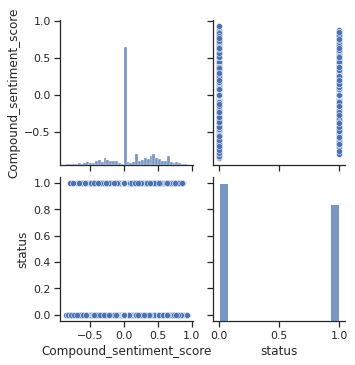

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(stock_and_message[["Compound_sentiment_score","status"]])
plt.show()

In [31]:
import numpy as np

coorelation=np.corrcoef(stock_and_message[["status","Compound_sentiment_score"]]);
coorelation

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning:

invalid value encountered in true_divide



array([[ 1.,  1.,  1., ..., -1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       ...,
       [-1., -1., -1., ...,  1., -1., -1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.]])

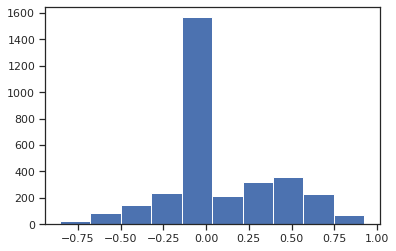

In [32]:
plt.hist(stock_and_message.Compound_sentiment_score);

In [33]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "status",
          y = "Compound_sentiment_score",

          title = "Showing relation between Compound_sentiment_score and status<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

In [34]:
# showing the relation between open_stock,low_stock and status. 
stockVsSentiment = px.scatter(stock_and_message,
          x  = "low_stock",
          y = "high_stock",

          title = "Showing relation between high_stock and low_stock<br><br>Hover over the dots to see details👇<br>",

          # color based on stock up or low column
          color = "status",
)
stockVsSentiment.show()

In [36]:
stock_and_message.isnull().any()

Date                        False
News                        False
open_stock                  False
high_stock                  False
low_stock                   False
status                      False
btc_open                    False
btc_high                    False
btc_low                     False
btc_volume                  False
gold_open                   False
gold_high                   False
gold_low                    False
gold_volume                 False
Compound_sentiment_score    False
dtype: bool

# Model Training  -- Phase 2

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
stock_and_message.columns

Index(['Date', 'News', 'open_stock', 'high_stock', 'low_stock', 'status',
       'btc_open', 'btc_high', 'btc_low', 'btc_volume', 'gold_open',
       'gold_high', 'gold_low', 'gold_volume', 'Compound_sentiment_score'],
      dtype='object')

In [41]:
df_x=stock_and_message.drop(columns=["Date","News","status"])
df_y=stock_and_message.status

In [42]:
df_x.head()

,open_stock,high_stock,low_stock,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,171.899994,177.550003,171.869995,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
1,171.899994,177.550003,171.869995,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.0000
2,171.899994,177.550003,171.869995,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.1531
3,171.899994,177.550003,171.869995,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,0.2960
4,171.899994,177.550003,171.869995,23521.837891,23585.384766,23077.650391,20535363434,1808.099976,1830.0,1808.099976,618,-0.2755


In [43]:
df_x=df_x/df_x.max()

In [44]:
df_x.head(4)

,open_stock,high_stock,low_stock,btc_open,btc_high,btc_low,btc_volume,gold_open,gold_high,gold_low,gold_volume,Compound_sentiment_score
0,0.321026,0.330584,0.325382,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,0.000000
1,0.321026,0.330584,0.325382,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,0.000000
2,0.321026,0.330584,0.325382,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,-0.165335
3,0.321026,0.330584,0.325382,0.383589,0.377856,0.386591,0.162517,0.914799,0.925037,0.922688,0.002946,0.319654


In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=43)

In [48]:

tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
     tf.keras.layers.Dropout(.2),
     tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(40, activation=tf.keras.activations.relu),
     tf.keras.layers.Dropout(.2),
     tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(8, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model.fit(x_train,y_train, epochs=500)

Epoch 1/500
102/102 [==============================] - 4s 3ms/step - loss: 0.6912 - accuracy: 0.5292
Epoch 2/500
102/102 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5400
Epoch 3/500
102/102 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5403
Epoch 4/500
102/102 [==============================] - 1s 5ms/step - loss: 0.6881 - accuracy: 0.5384
Epoch 5/500
102/102 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5381
Epoch 6/500
102/102 [==============================] - 1s 5ms/step - loss: 0.6871 - accuracy: 0.5467
Epoch 7/500
102/102 [==============================] - 1s 5ms/step - loss: 0.6869 - accuracy: 0.5461
Epoch 8/500
102/102 [==============================] - 1s 5ms/step - loss: 0.6880 - accuracy: 0.5347
Epoch 9/500
102/102 [==============================] - 1s 5ms/step - loss: 0.6869 - accuracy: 0.5409
Epoch 10/500
102/102 [==============================] - 0s 3ms/step - loss: 0.6854 - accura

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1300      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 40)                2040      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                1312      
                                                                 
 dense_18 (Dense)            (None, 16)               

# Model Evaluation

In [70]:
accuracy_of_model=model.evaluate(x_test,y_test)
print("Accuracy of model is: ",accuracy_of_model)

21/21 [==============================] - 0s 11ms/step - loss: 0.4820 - accuracy: 0.7266
Accuracy of model is:  [0.4819566011428833, 0.7265744805335999]


# Predictions

In [64]:
predictions=model.predict(x_test[:10])
success_count=0
failure_count=0
for el in predictions:
 if el>=0.5:
   success_count+=1
 else:
    failure_count+=1

1/1 [==============================] - 0s 31ms/step


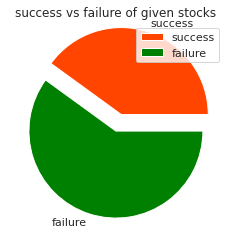

In [67]:
import matplotlib.pyplot as plt

y = [success_count,failure_count]
mylabels = ["success", "failure"]
myexplode = [0.2,0]
mycolors = ["orangered","green"]
plt.pie(y, labels = mylabels, explode = myexplode,colors=mycolors)
plt.title("success vs failure of given stocks")
plt.legend()
plt.show() 

In [68]:
# stock folder is made in current directory which contains weights and every information of the model
model.save("./Stock")